In [43]:
#IMPOrt Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [44]:
df = pd.read_csv('/content/Dataset_B_hotel.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [45]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [46]:
df.shape

(36275, 19)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [48]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0


In [49]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [50]:
#EDA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.000,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.000,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.000,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.000,17.0
required_car_parking_space,35005.0,0.031281,0.174079,0.0,0.0,0.00,0.000,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.000,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.000,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.000,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.000,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.000,1.0


In [51]:
df.describe(include='object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,35368,36275,36275,36275
unique,36275,4,7,5,2
top,INN36275,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27157,28130,23214,24390


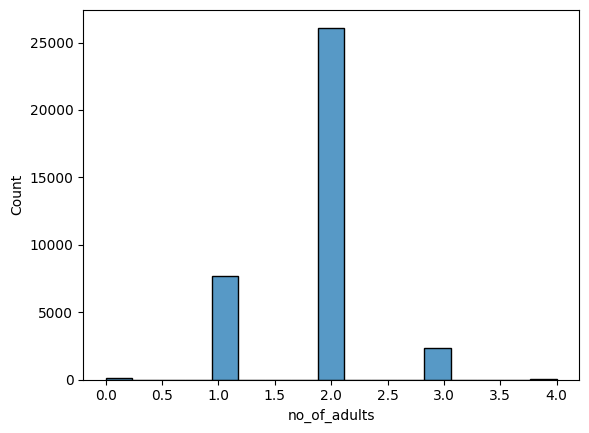

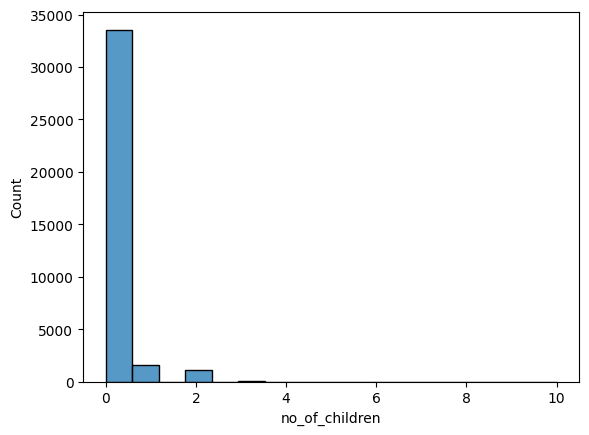

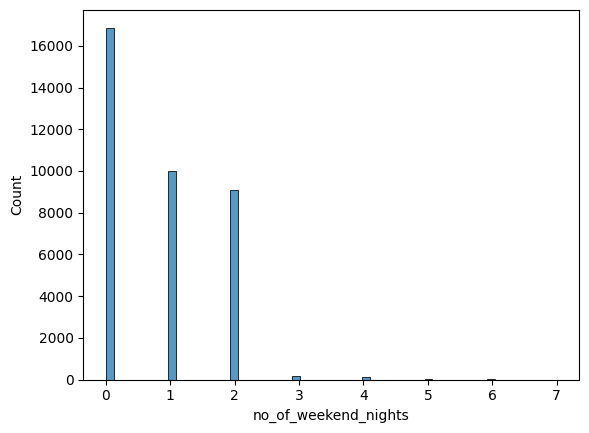

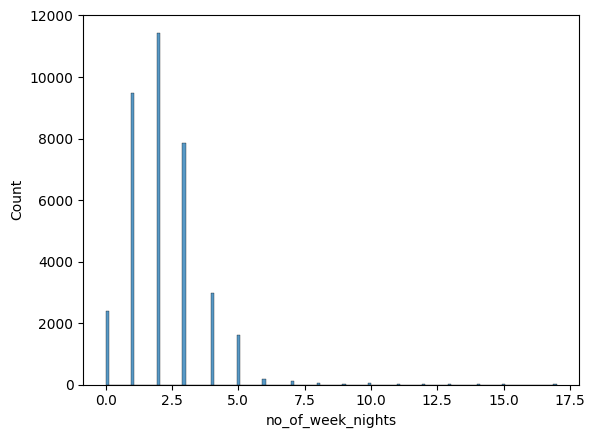

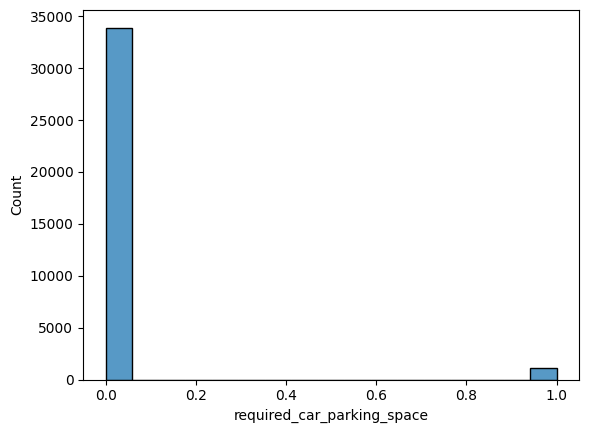

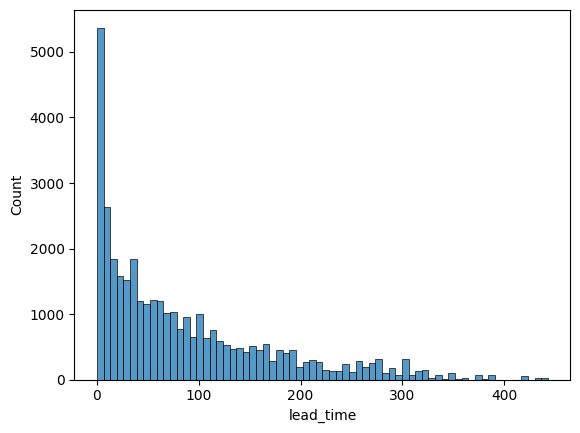

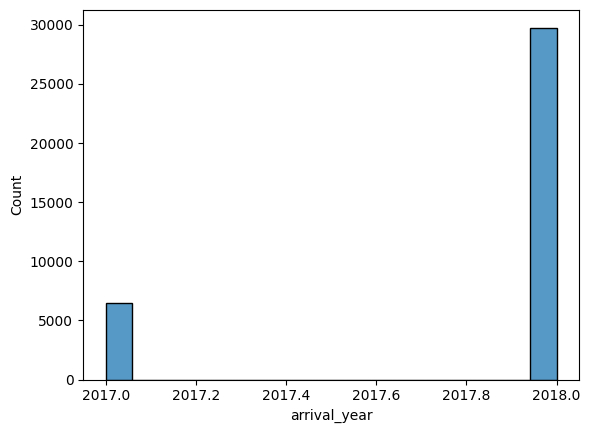

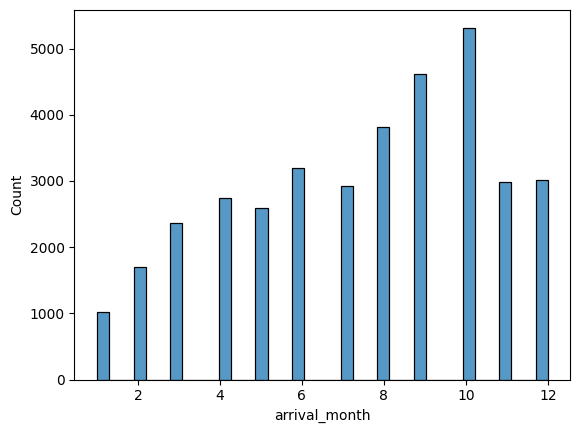

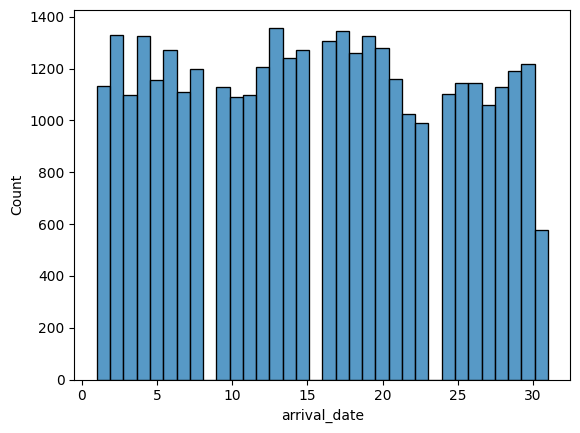

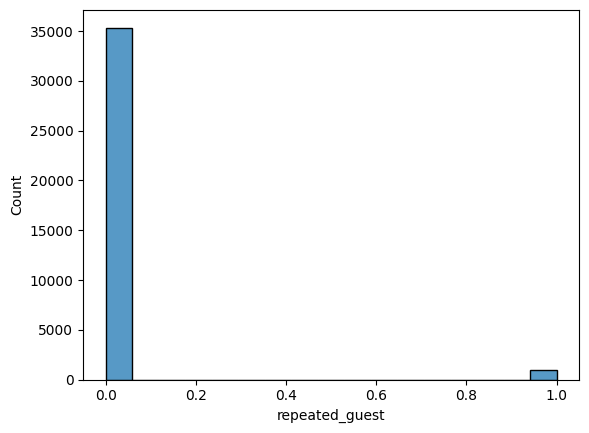

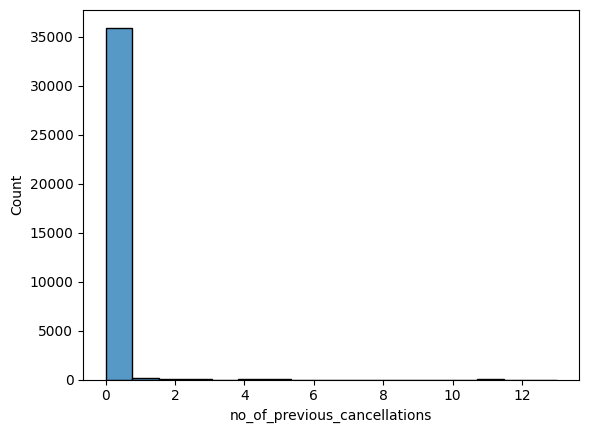

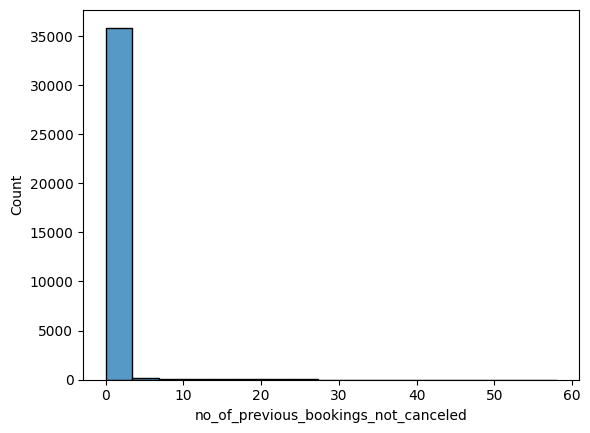

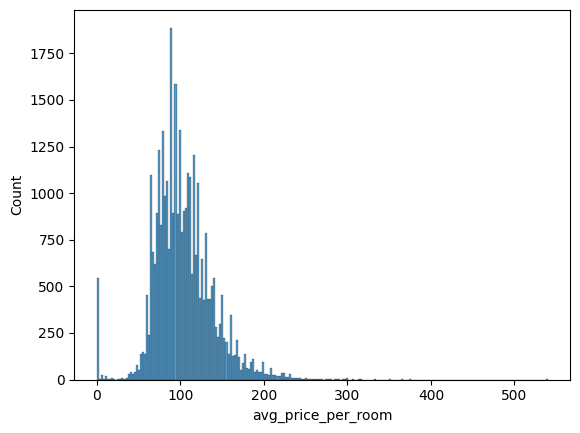

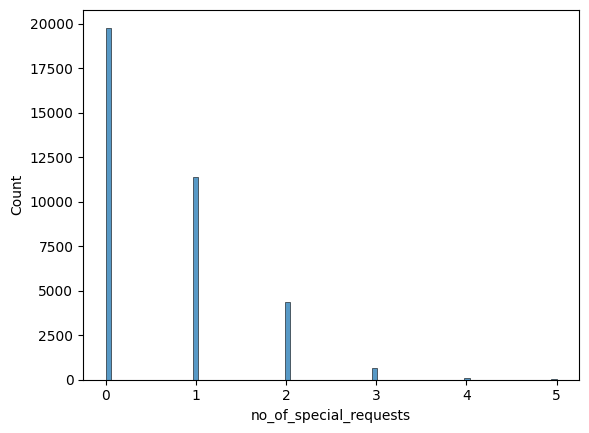

In [52]:
#Histogram
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

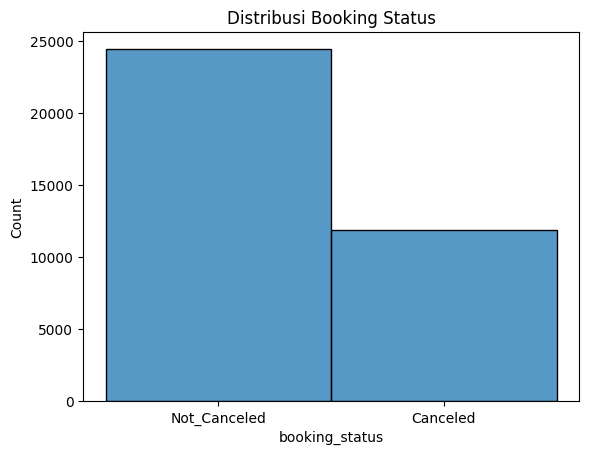

In [53]:
sns.histplot(df['booking_status'], kde= False)
plt.title("Distribusi Booking Status")
plt.show()

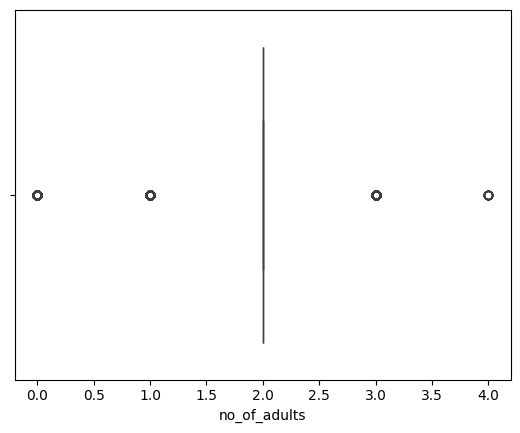

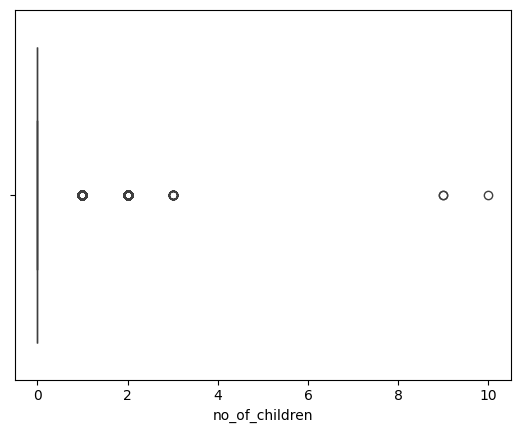

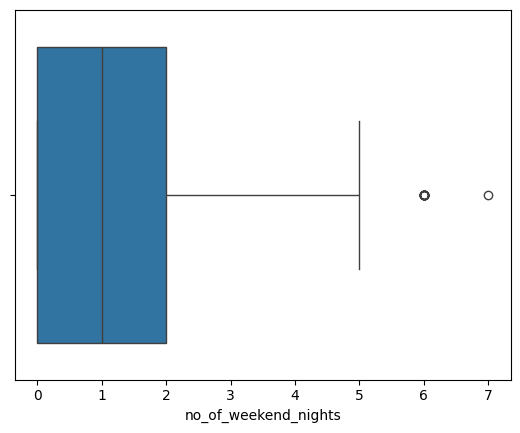

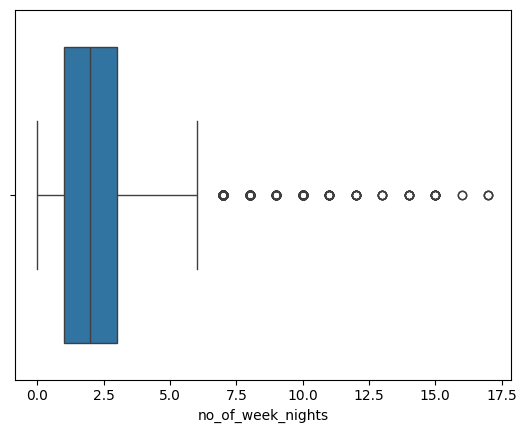

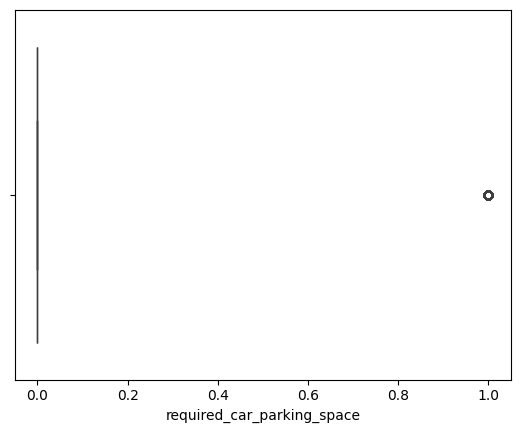

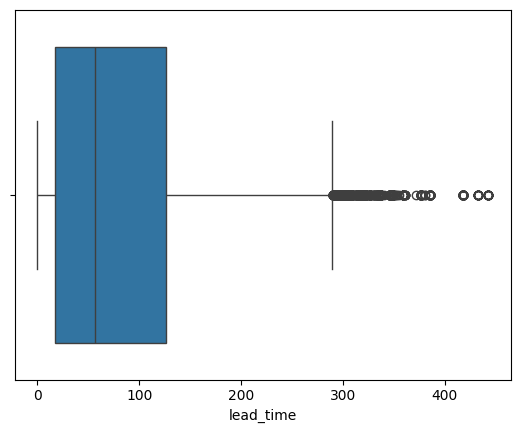

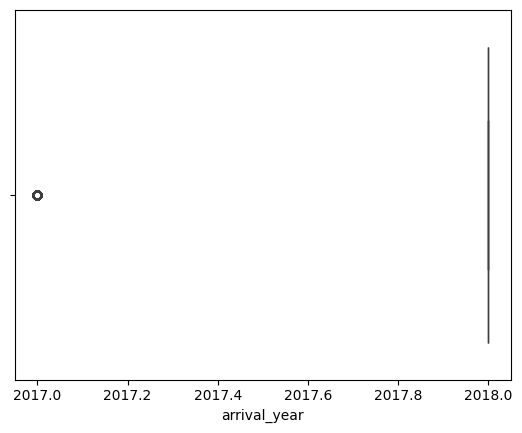

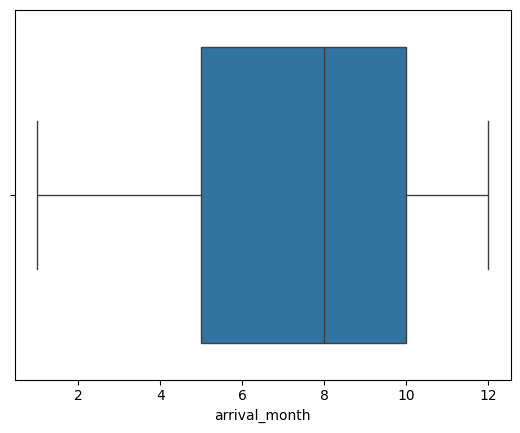

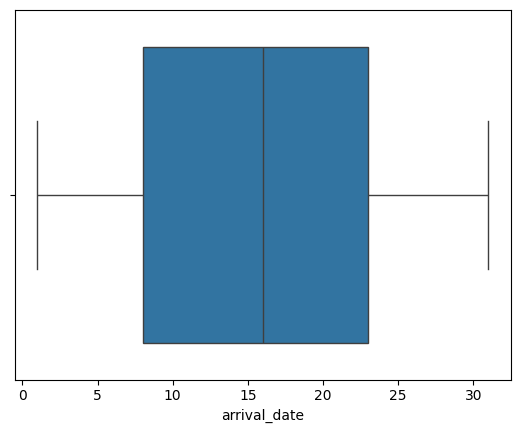

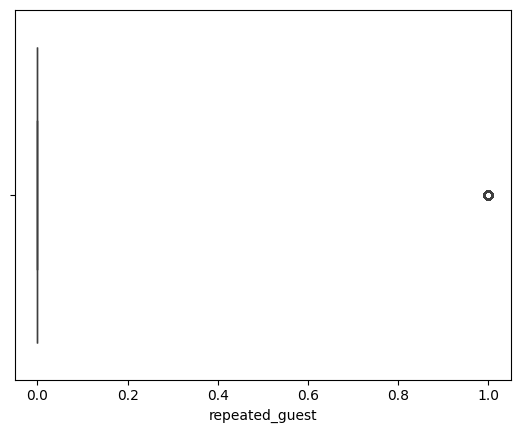

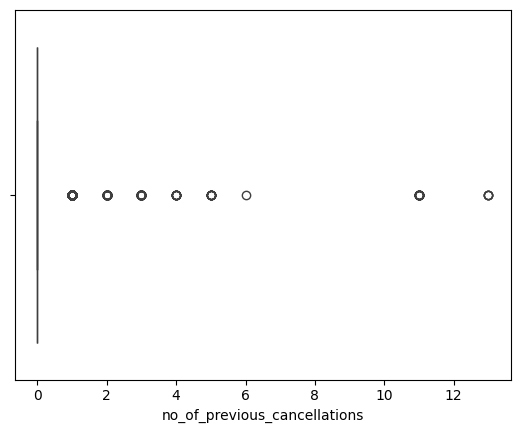

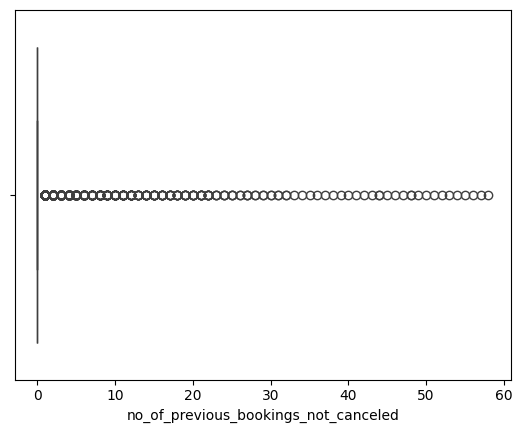

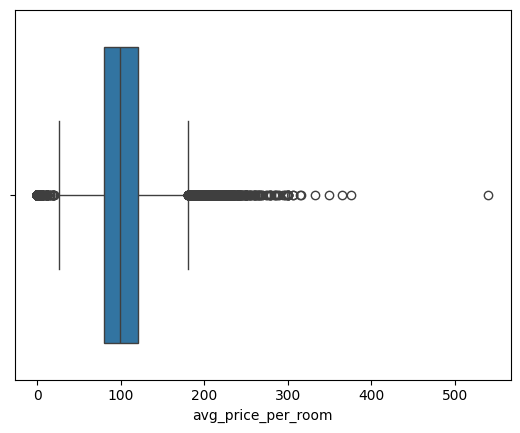

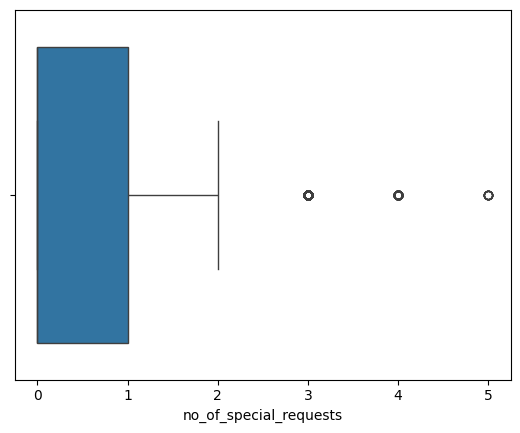

In [54]:
#Boxplot
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [55]:
#scatter plot
df.select_dtypes(include="number").columns


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

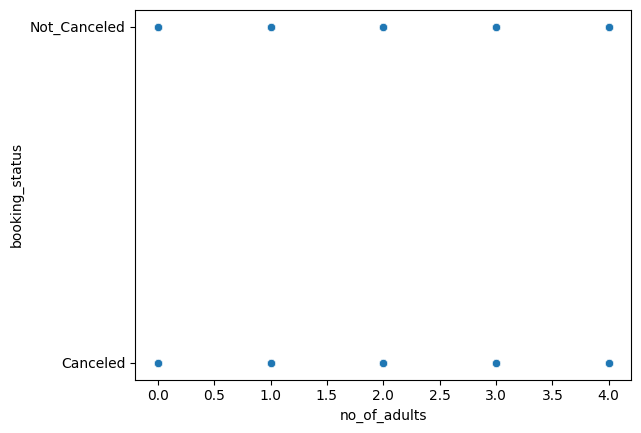

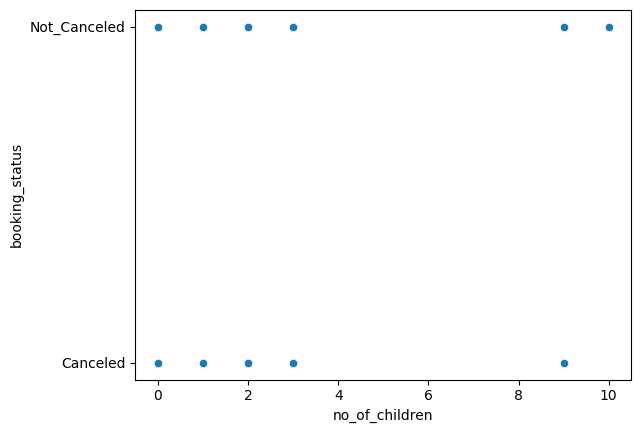

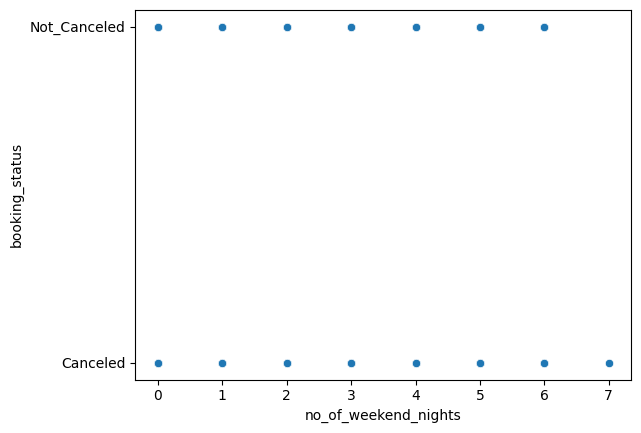

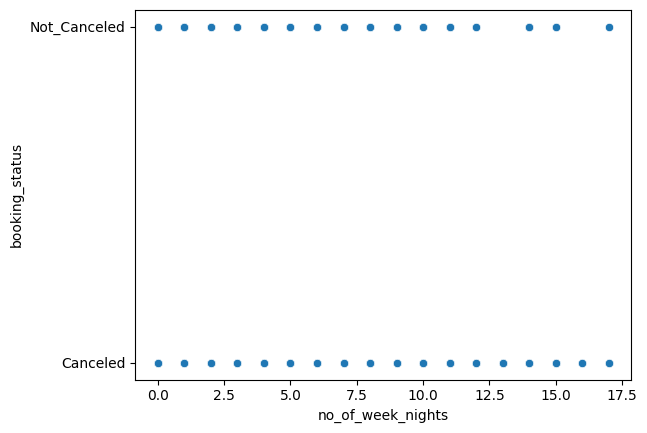

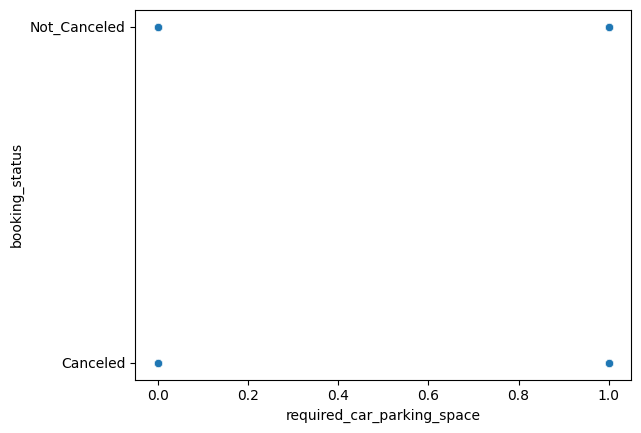

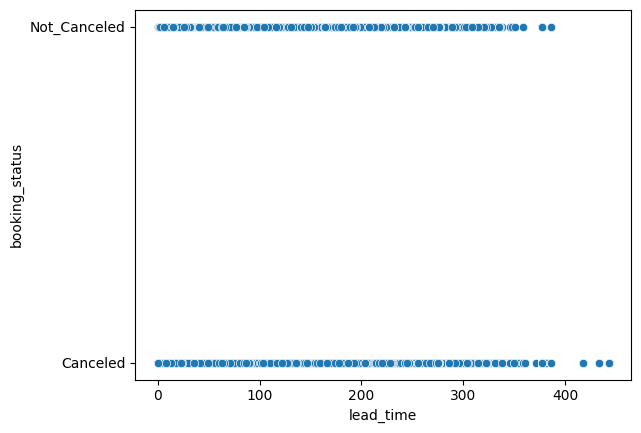

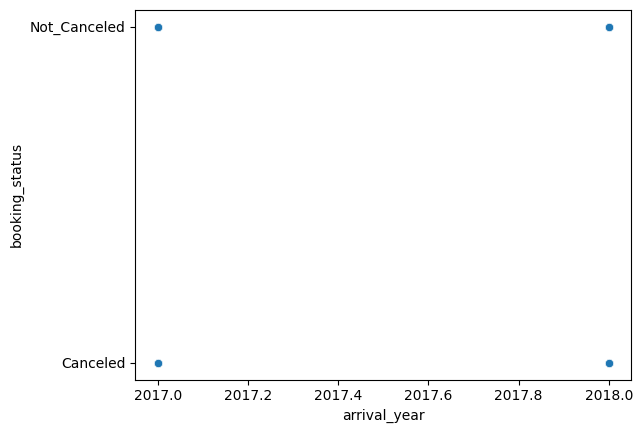

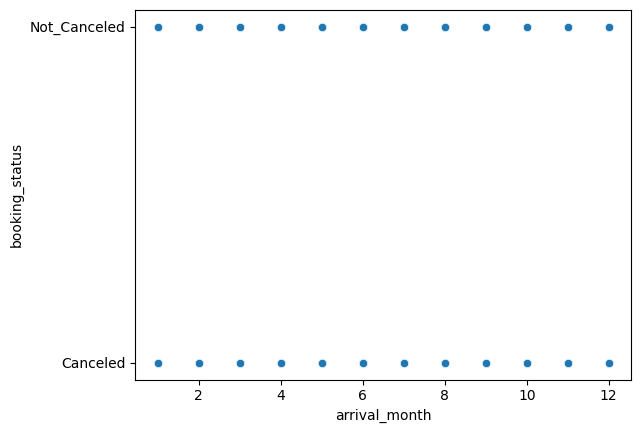

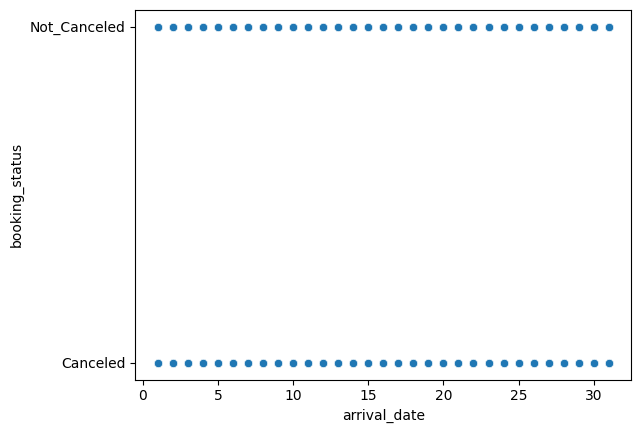

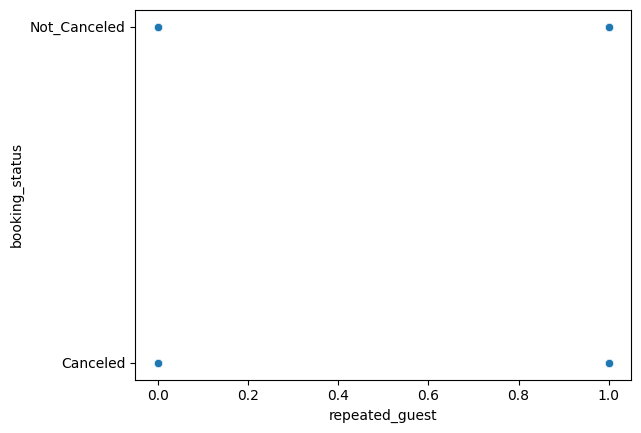

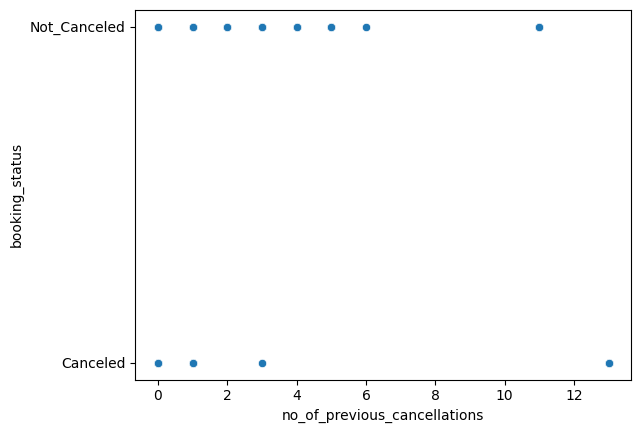

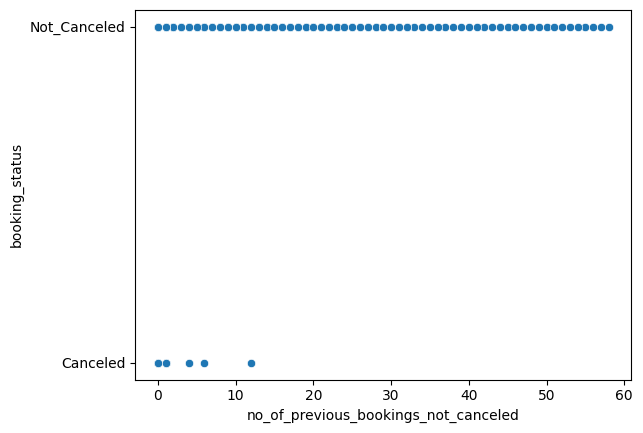

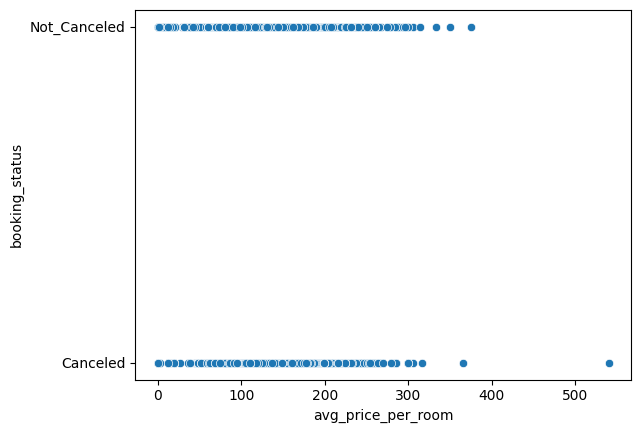

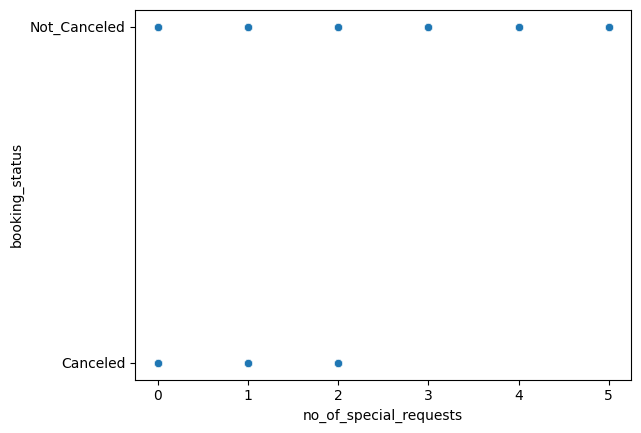

In [56]:
for i in ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'] :
    sns.scatterplot(data=df,x=i,y='booking_status')
    plt.show()

In [57]:
df.select_dtypes(include="number").corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011484,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296073,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.032805,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337032,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.030401,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.003026,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048445,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022923,0.045994
required_car_parking_space,0.011484,0.032805,-0.030401,-0.048445,1.000000,-0.066650,0.015489,-0.015547,-0.000043,0.111251,0.025826,0.064184,0.062585,0.088409
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066650,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.063616,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015489,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.177556,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015547,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.052596,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000043,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.019018,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.111251,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.176126,-0.011820


<Axes: >

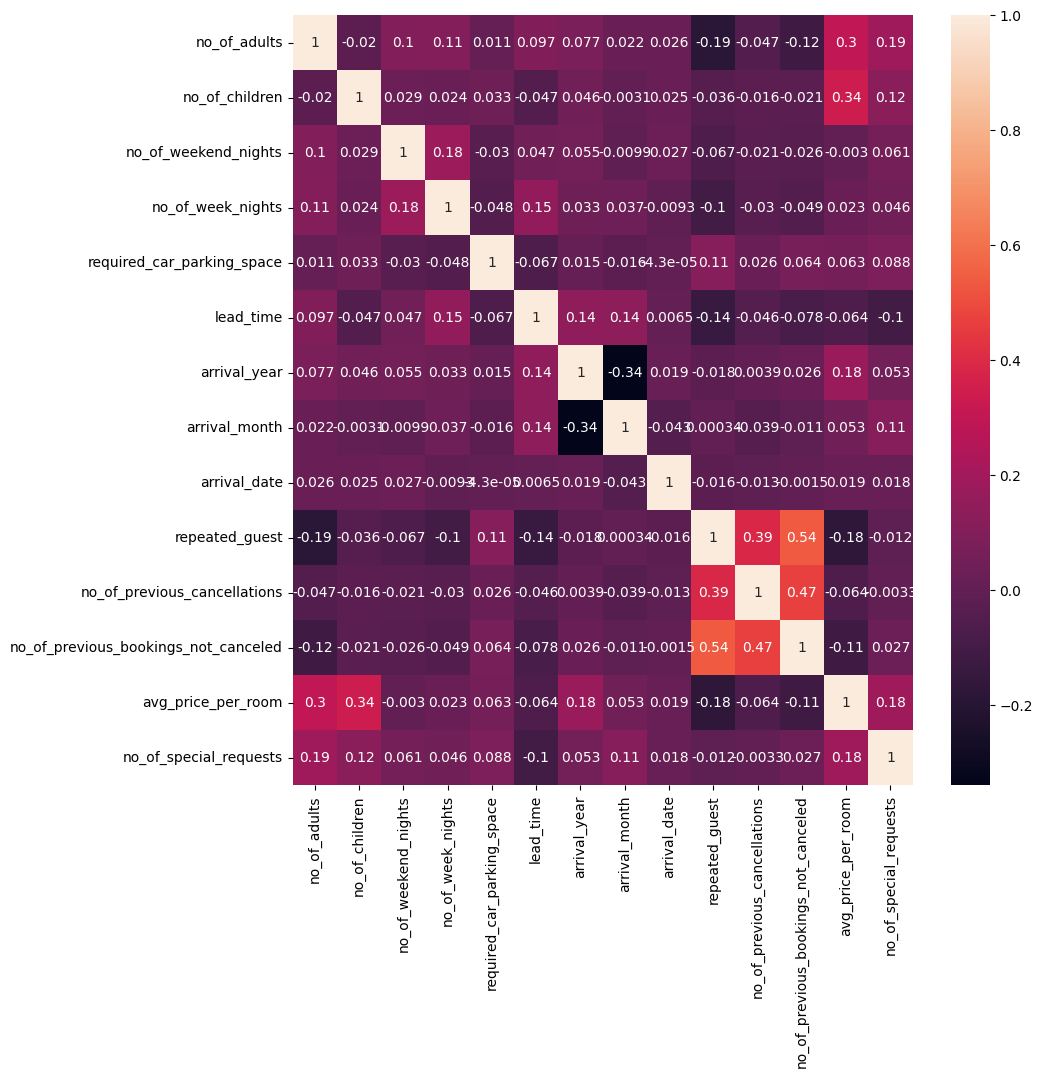

In [58]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)

In [59]:
#Preprocessing
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0


In [60]:
df.select_dtypes(include="object").columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [61]:
df.select_dtypes(include="number").columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [62]:
#Preprocessing for categorical column
df['type_of_meal_plan'] = df['type_of_meal_plan'].fillna(df['type_of_meal_plan'].mode()[0])

In [63]:
df['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,28064
Not Selected,4986
Meal Plan 2,3220
Meal Plan 3,5


In [64]:
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(df['required_car_parking_space'].mean())

In [65]:
df['required_car_parking_space'].value_counts()

,count
required_car_parking_space,
0.000000,33910
0.031281,1270
1.000000,1095


In [66]:
df['avg_price_per_room'] = df['avg_price_per_room'].fillna(df['avg_price_per_room'].mean())

In [67]:
# Drop Booking_ID
df = df.drop(columns=["Booking_ID"])

In [68]:
#Preprocessing for categorical column
df_encoded = df.copy()

label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [69]:
df_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0.0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0.0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0.0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0.0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0.0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [70]:
df_encoded.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [71]:
df_encoded_input = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]
df_encoded_target=df[['booking_status']]

In [72]:
df_encoded.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [74]:
X = df_encoded.drop("booking_status", axis=1)
y = df_encoded["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_trainres, y_trainres = sm.fit_resample(X_train, y_train)

In [77]:
#Random Forest
#Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8965885596140593


In [78]:
from sklearn.metrics import classification_report
# Normal X_train, y_train
rf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = rf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      9469
           1       0.97      0.99      0.98     19551

    accuracy                           0.98     29020
   macro avg       0.98      0.97      0.97     29020
weighted avg       0.98      0.98      0.98     29020



In [79]:
# X_train, y_train with Oversampler which is SMOTEENN
rf.fit(X_trainres, y_trainres)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = rf.predict(X_trainres)
print(classification_report(y_trainres, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2416
           1       0.92      0.89      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14867
           1       1.00      1.00      1.00     12042

    accuracy                           1.00     26909
   macro avg       1.00      1.00      1.00     26909
weighted avg       1.00      1.00      1.00     26909



In [80]:
#Feature Importance Checking

rf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200, random_state = 42)
rf.fit(X_train, y_train)
fea_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(fea_imp)


                                 Feature  Importance
7                              lead_time    0.327561
15                    avg_price_per_room    0.155546
16                no_of_special_requests    0.108756
10                          arrival_date    0.082080
9                          arrival_month    0.078324
11                   market_segment_type    0.062209
3                      no_of_week_nights    0.046355
2                   no_of_weekend_nights    0.033768
8                           arrival_year    0.026805
0                           no_of_adults    0.025336
4                      type_of_meal_plan    0.016695
6                     room_type_reserved    0.014591
5             required_car_parking_space    0.010738
1                         no_of_children    0.006739
12                        repeated_guest    0.002423
14  no_of_previous_bookings_not_canceled    0.001728
13          no_of_previous_cancellations    0.000347


XGBOOST

In [81]:
#Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0]
}
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best Cross-Validation Score: 0.8923501033769814


In [82]:
# X_train, y_train normal
xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = xgb.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.77      0.81      2416
           1       0.89      0.93      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.87      0.85      0.86      7255
weighted avg       0.88      0.88      0.88      7255

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      9469
           1       0.90      0.94      0.92     19551

    accuracy                           0.89     29020
   macro avg       0.88      0.87      0.87     29020
weighted avg       0.89      0.89      0.89     29020



In [83]:
# X_train, y_train with Oversampler which is SMOTEENN
xgb.fit(X_trainres, y_trainres)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred = xgb.predict(X_trainres)
print(classification_report(y_trainres, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      2416
           1       0.92      0.86      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.83      0.85      0.84      7255
weighted avg       0.86      0.85      0.86      7255

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14867
           1       0.95      0.95      0.95     12042

    accuracy                           0.95     26909
   macro avg       0.95      0.95      0.95     26909
weighted avg       0.95      0.95      0.95     26909



In [84]:
#Feature Importance Checking

xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
fea_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(fea_imp)

                                 Feature  Importance
11                   market_segment_type    0.195596
16                no_of_special_requests    0.136522
7                              lead_time    0.131214
8                           arrival_year    0.084805
0                           no_of_adults    0.076225
5             required_car_parking_space    0.072864
15                    avg_price_per_room    0.053962
9                          arrival_month    0.047808
2                   no_of_weekend_nights    0.044721
12                        repeated_guest    0.042705
3                      no_of_week_nights    0.025100
4                      type_of_meal_plan    0.020661
6                     room_type_reserved    0.017425
10                          arrival_date    0.017386
1                         no_of_children    0.014755
14  no_of_previous_bookings_not_canceled    0.011080
13          no_of_previous_cancellations    0.007170


In [85]:
import joblib

# Save model and scaler using joblib (with .pkl extension)
joblib.dump((rf, scaler), "best_model_rf_compressed.pkl", compress=3)


['best_model_rf_compressed.pkl']

In [ ]:
import pickle

# Simpan model dan scaler
with open("best_model_rf.pkl", "wb") as f:
    pickle.dump((rf, scaler), f)
